In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

sns.set_theme(color_codes=True)
sys.path.insert(0, ".././0.data-download/scripts/")

from matplotlib.pyplot import figure, gcf
from sklearn.decomposition import PCA
from tensorflow import keras

import blitzgsea as blitz
import urllib.request

# Download the gene set library here: https://github.com/MaayanLab/blitzgsea


2023-02-24 15:19:58.835384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random.seed(18)
print(random.random())

0.18126486333322134


In [3]:
# list available gene set libraries in Enrichr
blitz.enrichr.print_libraries()

{'LIBRARY_LIST_URL': 'https://maayanlab.cloud/speedrichr/api/listlibs', 'LIBRARY_DOWNLOAD_URL': 'https://maayanlab.cloud/Enrichr/geneSetLibrary?mode=text&libraryName='}
0 - GeneSigDB
1 - Enrichr_Submissions_TF-Gene_Coocurrence
2 - SysMyo_Muscle_Gene_Sets
3 - WikiPathway_2021_Human
4 - HomoloGene
5 - WikiPathways_2013
6 - OMIM_Disease
7 - Data_Acquisition_Method_Most_Popular_Genes
8 - Cancer_Cell_Line_Encyclopedia
9 - WikiPathways_2016
10 - WikiPathways_2015
11 - RNAseq_Automatic_GEO_Signatures_Human_Up
12 - Human_Gene_Atlas
13 - KOMP2_Mouse_Phenotypes_2022
14 - Kinase_Perturbations_from_GEO_down
15 - Disease_Signatures_from_GEO_down_2014
16 - Disease_Perturbations_from_GEO_up
17 - Old_CMAP_down
18 - MCF7_Perturbations_from_GEO_up
19 - NIH_Funded_PIs_2017_GeneRIF_ARCHS4_Predictions
20 - DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
21 - PPI_Hub_Proteins
22 - Disease_Signatures_from_GEO_up_2014
23 - GTEx_Tissue_Expression_Up
24 - L1000_Kinase_and_GPCR_Perturbations_up
25 - ARCHS4_Cell-l

In [4]:
# use enrichr submodule to retrieve gene set library
# these libraries are finicky to work with--they usually work the first time but then may stop working. You may need to remove the library from your computer and trying to reimport it to work again.
library = blitz.enrichr.get_library("GO_Biological_Process_2017")

In [5]:
# load the weight matrix 
gene_weight_dir = pathlib.Path("../2.train-VAE//results/weight_matrix_gsea.csv")
signature = pd.read_csv(gene_weight_dir)
print(signature.shape)
signature.head()

(1000, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,GPX4,-0.027460,-0.070779,0.001731,-0.094848,0.073441,-0.045740,-0.013464,-0.003496,-0.054087,...,-0.001064,-0.025719,-0.051441,-0.059867,-0.047008,-0.097932,0.047892,-0.098538,-0.076435,-0.097514
1,CDK6,0.002897,-0.163369,-0.048610,0.013512,0.006774,-0.013377,-0.061763,0.044270,-0.067225,...,-0.032070,-0.011596,0.032896,0.024067,-0.014068,-0.109819,-0.040015,-0.151256,-0.070344,-0.050638
2,CCND1,0.068403,0.170713,-0.107413,-0.019957,-0.091245,-0.027354,-0.013429,-0.002953,0.020394,...,-0.156945,0.088128,-0.012880,-0.036969,0.005773,0.013009,-0.094061,0.222050,0.079966,0.150750
3,ITGAV,0.104246,0.044185,-0.065313,-0.095490,0.022715,-0.062570,0.006958,0.025696,0.023273,...,-0.031745,0.041369,-0.015924,-0.087925,-0.021463,0.022722,-0.096038,0.010021,0.092492,0.092633
4,FBXW11,-0.061374,-0.073591,-0.018279,-0.016236,0.008553,-0.037758,0.008728,0.002456,-0.036165,...,0.097396,0.059990,0.030646,-0.013488,-0.032021,0.040819,-0.021807,-0.048628,-0.061967,-0.038415


In [6]:
all_GSEA_results = []
all_signatures = []
#negative_control = []
for col in signature.iloc[:,1:50].columns:
    df = signature.iloc[:,[0,int(col)]]
    result = blitz.gsea(df, library)
    all_GSEA_results.append(result.assign(z_dim=f"z_{col}"))
    all_signatures.append(df)
    #add line here to create a negative control--this will be a random scramble of the gene scores
all_GSEA_results

/home/rosedoss/anaconda3/envs/gene_dependency_representations/lib/python3.10/site-packages/blitzgsea/__init__.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signature.iloc[:,1] = signature.iloc[:,1] + np.random.normal(signature.shape[0])/(np.mean(np.abs(signature.iloc[:,1]))*100000)
Calibration: 100%|██████████| 20/20 [00:02<00:00,  9.37it/s]
/home/rosedoss/anaconda3/envs/gene_dependency_representations/lib/python3.10/site-packages/blitzgsea/__init__.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

[                                                          es       nes  \
 Term                                                                     
 NUCLEAR-TRANSCRIBED MRNA POLY(A) TAIL SHORTENIN...  0.688784  2.833861   
 CHROMATIN REMODELING (GO:0006338)                  -0.429263 -2.280756   
 POSITIVE REGULATION OF SEQUENCE-SPECIFIC DNA BI... -0.495617 -2.164164   
 MITOTIC CELL CYCLE (GO:0000278)                     0.475445  2.159309   
 REGULATION OF PROTEIN STABILITY (GO:0031647)       -0.492944 -2.147846   
 ...                                                      ...       ...   
 TELOMERE MAINTENANCE (GO:0000723)                   0.259068  0.000000   
 ENDOCYTOSIS (GO:0006897)                            0.331658  0.000000   
 POSITIVE REGULATION OF GENE EXPRESSION (GO:0010...  0.187460  0.000000   
 TRANSCRIPTION FROM RNA POLYMERASE II PROMOTER (...  0.164424  0.000000   
 MEMBRANE FUSION (GO:0061025)                        0.331658  0.000000   
 
                       

In [7]:
# stack up all of the results to be analyzed
all_GSEA_results= pd.concat(all_GSEA_results)

In [8]:
# sort by what you want to evaluate
all_GSEA_results.sort_values(by='es', ascending=False)

,es,nes,pval,sidak,fdr,geneset_size,leading_edge,z_dim
Term,,,,,,,,
AEROBIC RESPIRATION (GO:0009060),0.787361,2.350912,0.018727,0.984958,0.519688,5,"UQCRB,UQCRC1,SDHB",z_41
PHOSPHATIDYLINOSITOL 3-KINASE SIGNALING (GO:0014065),0.763780,2.481223,0.013093,0.946383,0.695950,5,"IGF1R,ERBB3",z_16
POSITIVE REGULATION OF PROTEIN PHOSPHORYLATION (GO:0001934),0.754030,3.364204,0.000768,0.156743,0.170418,8,"ERBB2,BRAT1,CCND1,SOX9",z_37
FC-EPSILON RECEPTOR SIGNALING PATHWAY (GO:0038095),0.749497,3.012247,0.002593,0.438106,0.242497,6,"GRB2,KRAS,PSME3,PIK3CA,FBXW11",z_40
SMALL MOLECULE METABOLIC PROCESS (GO:0044281),0.749404,2.456727,0.014021,0.956486,1.000000,5,"ISCA1,ISCA2,FXN",z_5
...,...,...,...,...,...,...,...,...
FIBROBLAST GROWTH FACTOR RECEPTOR SIGNALING PATHWAY (GO:0008543),-0.767606,-3.405546,0.000660,0.136395,0.146591,6,"FGFR1,GRB2,HNRNPA1,PTPN11,SHOC2,PTBP1",z_42
NUCLEOSOME DISASSEMBLY (GO:0006337),-0.781910,-2.841236,0.004494,0.632082,0.599413,5,"SMARCB1,ARID1A,SMARCA4,SMARCD1,ARID2",z_14
T CELL RECEPTOR SIGNALING PATHWAY (GO:0050852),-0.822111,-3.045533,0.002323,0.403237,0.208528,5,"PSME3,PAK2,PIK3CA,BCAR1,FBXW11",z_21


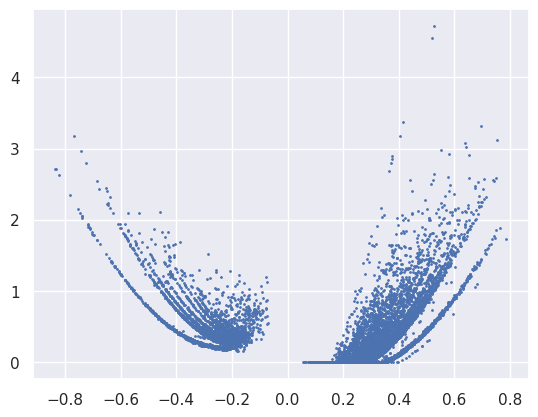

In [9]:
plt.scatter(x=all_GSEA_results['es'],y=all_GSEA_results['pval'].apply(lambda x:-np.log10(x)),s=1)

In [10]:
# plot the enrichment results and save to png--this code needs some work done to it in order to work!
fig = blitz.plot.running_sum(signature, "DIABETIC CARDIOMYOPATHY", library, result=result, compact=False)
fig.savefig("running_sum.png", bbox_inches='tight')

fig_compact = blitz.plot.running_sum(signature, "PATHOGENIC ESCHERICHIA COLI INFECTION", library, result=result, compact=True)
fig_compact.savefig("running_sum_compact.png", bbox_inches='tight')

fig_table = blitz.plot.top_table(signature, library, result, n=15)
fig_table.savefig("top_table.png", bbox_inches='tight')

KeyError: 1